In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 


In [91]:
# Load dataset
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
validation = pd.read_csv('dataset/validation.csv')

## Features

In [92]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'logtype', 'userid', 'useragent',
       'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid',
       'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat',
       'slotprice', 'creative', 'bidprice', 'payprice', 'keypage',
       'advertiser', 'usertag'],
      dtype='object')

In [93]:
# In order to display all the columns:
pd.options.display.max_columns = 26

In [94]:
train.head(10)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,adexchange,domain,url,urlid,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,2,trqRTuToMTNUjM9r5rMi,d48a96ab59d7ad741a48e781de44efeb,null,433287550,468,60,1,0,5,612599432d200b093719dd1f372f7a30,300,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063"
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,2,trqRTv14MqTR1m58uG,313e110c149d24b3236165d30879c595,null,2264242698,250,250,1,0,5,8dff45ed862a740986dbe688aafee7e5,249,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111"
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,1,trqRTJTxX5scg4,845b72208c27b993daa11c8104449e22,null,mm_40135906_3486753_11388735,336,280,0,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,2,trqRTuMvjTN7X9KbuKz,ea6709db2703ae8698755629f1f9df32,null,2536830969,728,90,0,0,162,7184c9560e68e977187e67e45a4f3198,238,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111"
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,1,trqRTu1YP5scFsf,b7b8e74eefbdd5cc1a9f0acb2e5c0d6c,null,mm_10075660_3500949_11453278,950,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005..."
5,0,3,22,97948108bc353d0f3ef1e0142afb0343,1,u_Vh5h1p2SDvFsGMa,windows_ie,111.227.172.*,3,6,1,trqRTJubX5scFsf,37bdc8299d3b42e6f04ccf4fca64bacc,null,mm_14539978_2071324_8355258,300,250,1,1,0,911b2d84826786018761e8c0b0a3a60c,227,99,d29e59bf0f7f8243858b8183f14d4412,3358,10063
6,0,5,16,26739c29a9294f157930f3f5bb7f5dc9,1,u_D89EGm6FGGV,windows_chrome,27.46.201.*,216,217,2,333a4ab5e4ae8e17d7ca86237721ba7a,4bf89e8bc0f9e55e8305087441b5276c,null,2932492844,728,90,OtherView,Na,5,7330,277,61,null,2259,"13866,10006,10111,10063"
7,0,0,21,404f5a6f3a1dde4ae1811646c065df3c,1,u_D9MLsHCazAr,windows_chrome,112.92.88.*,216,220,4,1164f4caea2d39bc9dcc8dd22bb0e5c8,37a58da844768798ec368daff8a5e94b,null,9223372032560960619,960,90,FirstView,Na,0,10717,294,39,null,2821,"13042,10024,10006,10110,10031,10063"
8,0,4,17,39095668ca6fd532b7c6d3dfad538997,1,u_Vh5_LAT0322yFOl,windows_ie,218.77.12.*,201,213,2,trqRTv1EXQuYgMKE5SqW,da7852090bb61af96fbcd29898929149,null,3151450371,336,280,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,111,361e128affece850342293213691a043,3386,null
9,0,0,17,dd3e2fd0370f672e6cbc5597673f72e1,1,u_VhTnL7d7PtB8XWC,windows_ie,122.137.146.*,55,57,3,5F1RQS9rg5scFsf,19422c57c90579925952ed859eaf3f4d,null,News_F_bottom_Width,1000,90,0,0,31,832b91d59d0cb5731431653204a76c0e,300,30,bebefa5efe83beee17a3d245e7c5085b,1458,"13403,10057,10063,10083,10006,10110"


### Basic data analysis 

CTR = percentage of clicks per impression<br/>

CPM, cost per thousand of impressions, or how much it costs to have an ad published a thousand times on the Internet, and seen by users.<br/>

CPC, the product owner pays the website or host every time someone clicks on an advertisement banner.
The cost per click is defined according to keywords and success rate. A keyword is used for a search; its rate is assessed according to its success. <br/>
CPC = what you pay to get a click on your ad<br/>


Columns description:<br/>
logtype: 1 for impression <br/>
useragent: browsers like windows_ie or os <br/>
adexchange: 1 to 4 id of the "auction house" <br/>
urlid: null if is anonymous <br/>
slotvisitility: first view means that it appears without the user having to scroll down <br/>
bidprice: the "optimal" bid price <br/>
payprice: paid price after acution, highest bid price from competitors<br/> 
advertiser: Different categories of the advertiser<br/>

All the rows represent impressions (showing the ad after winning the auction) for which the biding price was higher that the payprice and also higher that the other competitors.

# 1. Basic statistics:



In [95]:
len(train)

2697738

In [96]:
# Number of clicks:
num_clicks = len(train[train.click==1])
print ("num of clicks: %d"%num_clicks)
# Number of impressions:
num_impressions = len(train)
print ("num of impressions: %d"%num_impressions)
# Click through Rate = Number of clicks / Number of impressions
CTR = num_clicks / num_impressions
print ("CTR: {:.4%}".format(CTR))

num of clicks: 2034
num of impressions: 2697738
CTR: 0.0754%


In [97]:
# Dataset statistics
dataset_stats = pd.DataFrame()
dataset_stats['advertiser'] = np.sort(train.advertiser.unique())
dataset_stats['impressions'] = train.groupby('advertiser').size().values
click = train.groupby('advertiser').click.value_counts()
dataset_stats['clicks'] = click.iloc[click.index.get_level_values('click') == 1].values  
dataset_stats['cost'] = train.groupby('advertiser').payprice.sum().values
dataset_stats['CTR'] = (((dataset_stats.clicks / dataset_stats.impressions) * 100).round(3)).astype(str) + '%'
dataset_stats['CPM'] = (((dataset_stats.cost / dataset_stats.impressions) * 1000).round(2)).astype(str)
dataset_stats['CPC'] = ((dataset_stats.cost / dataset_stats.clicks).round(2)).astype(str)

dataset_stats

,advertiser,impressions,clicks,cost,CTR,CPM,CPC
0,1458,540293,451,37231239,0.083%,68909.35,82552.64
1,2259,146778,45,13649026,0.031%,92990.95,303311.69
2,2261,120619,37,10789152,0.031%,89448.2,291598.7
3,2821,231416,144,20625766,0.062%,89128.52,143234.49
4,2997,54487,251,3413227,0.461%,62642.96,13598.51
5,3358,304782,233,28145288,0.076%,92345.64,120795.23
6,3386,498554,358,38341028,0.072%,76904.46,107097.84
7,3427,454031,340,36820111,0.075%,81096.03,108294.44
8,3476,346778,175,27481402,0.05%,79247.82,157036.58


In [98]:
# 1. Analysing CTR for weekdays
daily_CTR = pd.DataFrame()
daily_CTR['day'] = np.sort(train.weekday.unique())

click = train.groupby('weekday').click.value_counts()

imp_1458 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('weekday').advertiser.value_counts()
daily_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','weekday']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
daily_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
daily_CTR['clicks_3358'] = clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values

daily_CTR['CTR_1458'] = ((daily_CTR.clicks_1458 / daily_CTR.imps_1458) * 100).round(3)
daily_CTR['CTR_3358'] = ((daily_CTR.clicks_3358 / daily_CTR.imps_3358) * 100).round(3)

In [99]:
daily_CTR

,day,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,83994,33238,66,21,0.079,0.063
1,1,72204,30707,63,11,0.087,0.036
2,2,73810,26206,63,14,0.085,0.053
3,3,76509,81073,68,79,0.089,0.097
4,4,76835,41414,72,39,0.094,0.094
5,5,78485,58888,65,50,0.083,0.085
6,6,78456,33256,54,19,0.069,0.057


<IPython.core.display.Javascript object>


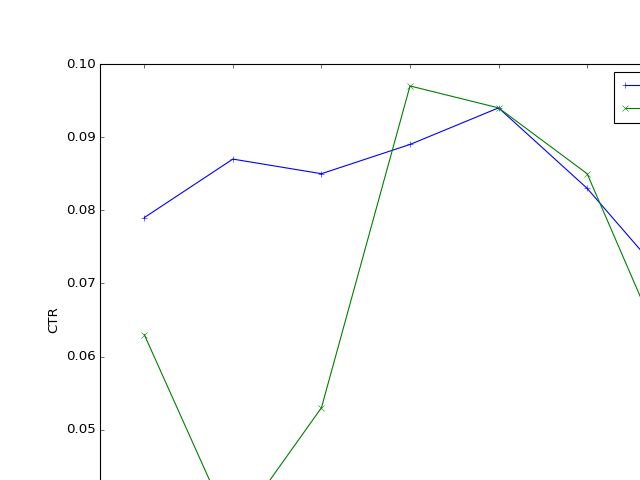

In [100]:
# Line plot of CTR per day of the week for advertiser 1458 & 3358
f, ax = plt.subplots(1)
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+daily_CTR.day.values, daily_CTR.CTR_3358.values,marker='x', label='3358')
plt.legend()
plt.ylabel('CTR')
plt.xlabel('weekdays')
ax.set_xlim(xmin = 0.5 , xmax = 7.5)
f.set_size_inches(10,8)
plt.draw()
plt.show()

In [101]:
# def plot_ctr(dataframe,y,x,list_advert_tot):
#     adv='advertiser'
#     # Mean time series:
#     for list_advert in list_advert_tot:
#         data = train
#         mean_data=data.groupby([x,adv]).mean()
#         ts_mean=mean_data.unstack(adv)[y][list_advert]

#         # STD:
#         std_data=data.groupby([x,adv]).std()
#         ts_std=std_data.unstack(adv)[y][list_advert]

#         # Totals:
#         totals=data.groupby([x,adv]).count()
#         ts_totals=totals.unstack(adv)[y][list_advert]

#         # margin:
#         margin=ts_std*2/np.sqrt(ts_totals)
#         plt.errorbar(x=ts_mean.index,y=ts_mean, yerr=margin,fmt='--o')
#     plt.legend(list_advert_tot, loc=0)
#     plt.grid(True)
#     plt.ylabel(y)
#     plt.xlabel(x)
#     plt.show()

In [102]:
# x= "weekday"
# y= "click"
# list_advert=[1458,3358]
# adv="advertiser"
# plot_ctr(train,y,x,list_advert)

In [103]:
# 2. Analyzing CTR per hour
hourly_CTR = pd.DataFrame()

hourly_CTR['hour'] = np.sort(train.hour.unique())

imp_1458 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('hour').advertiser.value_counts()
hourly_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','hour']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
hourly_CTR['clicks_1458'] = clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 1].values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
click3358 = list(clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 1].values)
click3358 = click3358[:4] + [0] + click3358[4:]
hourly_CTR['clicks_3358'] = click3358

hourly_CTR['CTR_1458'] = ((hourly_CTR.clicks_1458 / hourly_CTR.imps_1458) * 100).round(3)
hourly_CTR['CTR_3358'] = ((hourly_CTR.clicks_3358 / hourly_CTR.imps_3358) * 100).round(3)

In [104]:
hourly_CTR

,hour,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,25499,72359,23,70,0.090,0.097
1,1,11251,7583,8,8,0.071,0.105
2,2,6811,3527,14,2,0.206,0.057
3,3,7189,1447,6,2,0.083,0.138
4,4,3580,1307,6,0,0.168,0.000
5,5,4292,1103,4,1,0.093,0.091
6,6,5138,2797,2,4,0.039,0.143
7,7,10675,2835,5,1,0.047,0.035
8,8,15682,7960,9,6,0.057,0.075
9,9,19621,4700,18,1,0.092,0.021


<IPython.core.display.Javascript object>


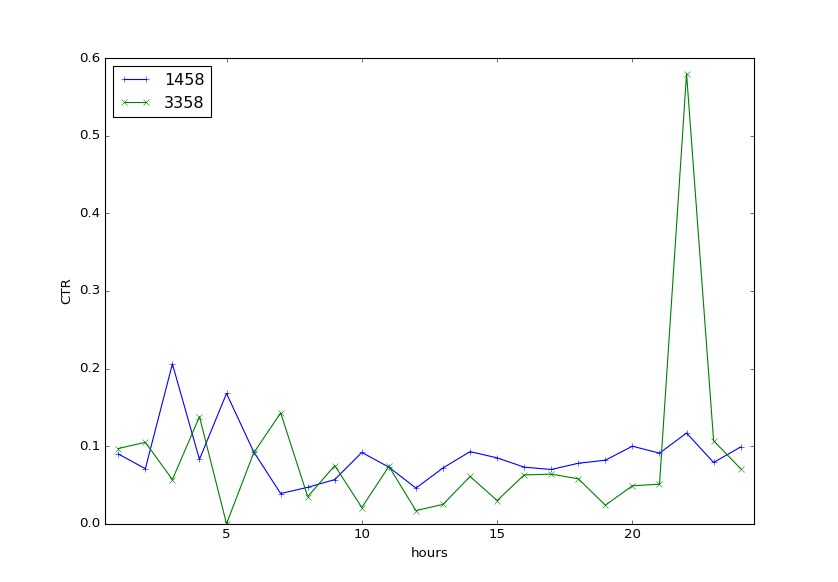

In [105]:
# Line plot of CTR per hour for advertiser 1458 & 3358

f, ax = plt.subplots(1)
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_1458.values, marker = '+', label='1458')
ax.plot(1+hourly_CTR.hour.values, hourly_CTR.CTR_3358.values,marker='x', label='3358')
plt.legend(loc=2)
plt.ylabel('CTR')
plt.xlabel('hours')
ax.set_xlim(xmin = 0.5 , xmax = 24.5)
f.set_size_inches(12,8)
plt.draw()
plt.show()

In [106]:
# 3. Analyzing CTR per region
region_CTR = pd.DataFrame()

region_CTR['region'] = np.sort(train.region.unique())

imp_1458 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('region').advertiser.value_counts()
region_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','region']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
region_CTR['clicks_1458'] = clickall_1458.groupby(level='region').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
region_CTR['clicks_3358'] = clickall_3358.groupby(level='region').sum().values

region_CTR['CTR_1458'] = ((region_CTR.clicks_1458 / region_CTR.imps_1458) * 100).round(3)
region_CTR['CTR_3358'] = ((region_CTR.clicks_3358 / region_CTR.imps_3358) * 100).round(3)

In [107]:
region_CTR

,region,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,0,7844,6162,9,13,0.115,0.211
1,1,23389,12157,17,6,0.073,0.049
2,2,8875,4820,3,2,0.034,0.041
3,3,27398,13246,20,15,0.073,0.113
4,15,16674,7968,18,7,0.108,0.088
5,27,7616,3754,5,3,0.066,0.080
6,40,20449,8965,9,6,0.044,0.067
7,55,12091,4823,11,2,0.091,0.041
8,65,12566,5684,11,5,0.088,0.088
9,79,14300,9523,17,9,0.119,0.095


<IPython.core.display.Javascript object>


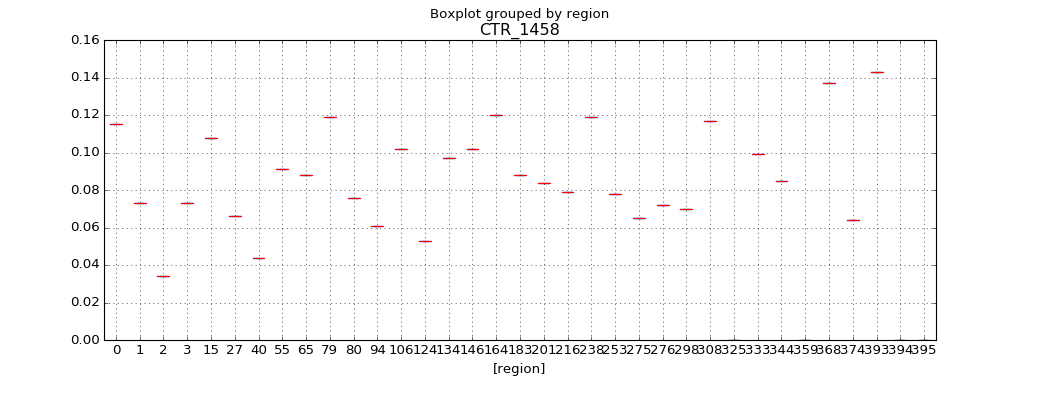

<IPython.core.display.Javascript object>


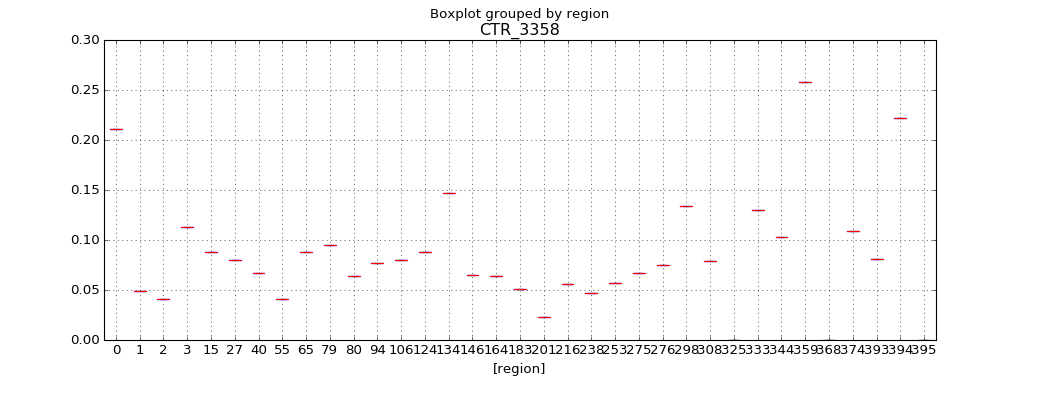

In [108]:
# Boxplot of CTR per region for advertiser 1458 & 3358
a1=region_CTR[['region','CTR_1458']]
ax1 = a1.boxplot(by='region', return_type='axes',figsize=(13,5))
a2 = region_CTR[['region','CTR_3358']]
a2.boxplot(by='region',figsize=(13,5))

In [109]:
# 4. Analyzing CTR per ad exchange
adexchange_CTR = pd.DataFrame()

adexchange_CTR['ad_exchange'] = np.sort(train.adexchange.unique())
adexchange_CTR = adexchange_CTR.drop([3,4])
imp_1458 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('adexchange').advertiser.value_counts()
adexchange_CTR['imps_3358'] = imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values 

click = train.groupby(['advertiser','adexchange']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_1458'] = clickall_1458.groupby(level='adexchange').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
adexchange_CTR['clicks_3358'] = clickall_3358.groupby(level='adexchange').sum().values

adexchange_CTR['CTR_1458'] = ((adexchange_CTR.clicks_1458 / adexchange_CTR.imps_1458) * 100).round(3)
adexchange_CTR['CTR_3358'] = ((adexchange_CTR.clicks_3358 / adexchange_CTR.imps_3358) * 100).round(3)

In [110]:
adexchange_CTR

,ad_exchange,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,1,182219,159379,146,146,0.080,0.092
1,2,160460,93691,126,48,0.079,0.051
2,3,197614,51712,179,39,0.091,0.075


<IPython.core.display.Javascript object>


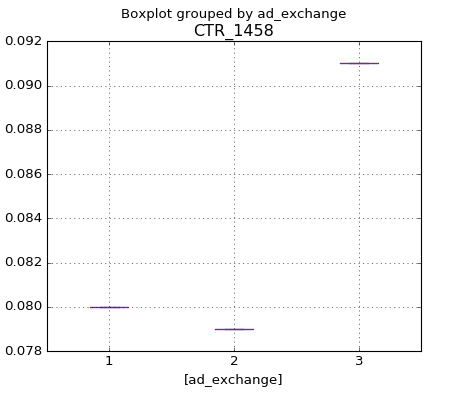

<IPython.core.display.Javascript object>


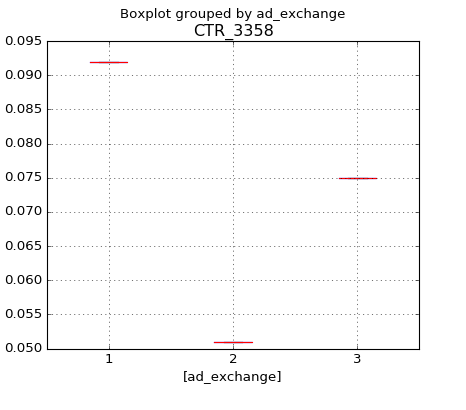

In [116]:
a1=adexchange_CTR[['ad_exchange','CTR_1458']]
#ax1 = a1.plot(by='ad_exchange',kind='bar',figsize=(10,6))
a2 = adexchange_CTR[['ad_exchange','CTR_3358']]
#a2.plot(by='ad_exchange',kind='bar',colormap='Accent_r',figsize=(10,6))
ax1 = a1.boxplot(by='ad_exchange', return_type='axes',figsize=(5,5))
a2.boxplot(by='ad_exchange',figsize=(5,5))
plt.show()

In [119]:
# 5. Analyzing CTR per user agent
useragent_CTR = pd.DataFrame()

useragent_CTR['useragent'] = np.sort(train.useragent.unique())
useragent_CTR = useragent_CTR.drop([12,18,25])
imp_1458 = train.groupby('useragent').advertiser.value_counts()
useragent_CTR['imps_1458'] = imp_1458.iloc[imp_1458.index.get_level_values('advertiser') == 1458].values 

imp_3358 = train.groupby('useragent').advertiser.value_counts()
imp_3358 = list(imp_3358.iloc[imp_3358.index.get_level_values('advertiser') == 3358].values)
imp_3358 = imp_3358[:22] + [0] + imp_3358[22:]
useragent_CTR['imps_3358'] = imp_3358

click = train.groupby(['advertiser','useragent']).click.value_counts()
clickall_1458 = click.iloc[click.index.get_level_values('advertiser') == 1458]
clickall_1458.iloc[clickall_1458.index.get_level_values('click') == 0]=0
useragent_CTR['clicks_1458'] = clickall_1458.groupby(level='useragent').sum().values

clickall_3358 = click.iloc[click.index.get_level_values('advertiser') == 3358]
clickall_3358.iloc[clickall_3358.index.get_level_values('click') == 0]=0
clickall_3358 = list(clickall_3358.groupby(level='useragent').sum().values)
clickall_3358 = clickall_3358[:22] + [0] + clickall_3358[22:]
useragent_CTR['clicks_3358'] = clickall_3358

useragent_CTR['CTR_1458'] = ((useragent_CTR.clicks_1458 / useragent_CTR.imps_1458) * 100).round(3)
useragent_CTR['CTR_3358'] = ((useragent_CTR.clicks_3358 / useragent_CTR.imps_3358) * 100).round(3)

In [120]:
useragent_CTR.fillna(0.0)

,useragent,imps_1458,imps_3358,clicks_1458,clicks_3358,CTR_1458,CTR_3358
0,android_chrome,74,101,1,1,1.351,0.990
1,android_firefox,5,4,0,0,0.000,0.000
2,android_ie,3,2,0,0,0.000,0.000
3,android_maxthon,6,5,0,0,0.000,0.000
4,android_opera,96,145,0,0,0.000,0.000
5,android_other,243,233,2,1,0.823,0.429
6,android_safari,3044,3813,17,15,0.558,0.393
7,android_sogou,1,1,0,0,0.000,0.000
8,ios_other,3,4,0,0,0.000,0.000
9,ios_safari,101,65,0,1,0.000,1.538


<IPython.core.display.Javascript object>


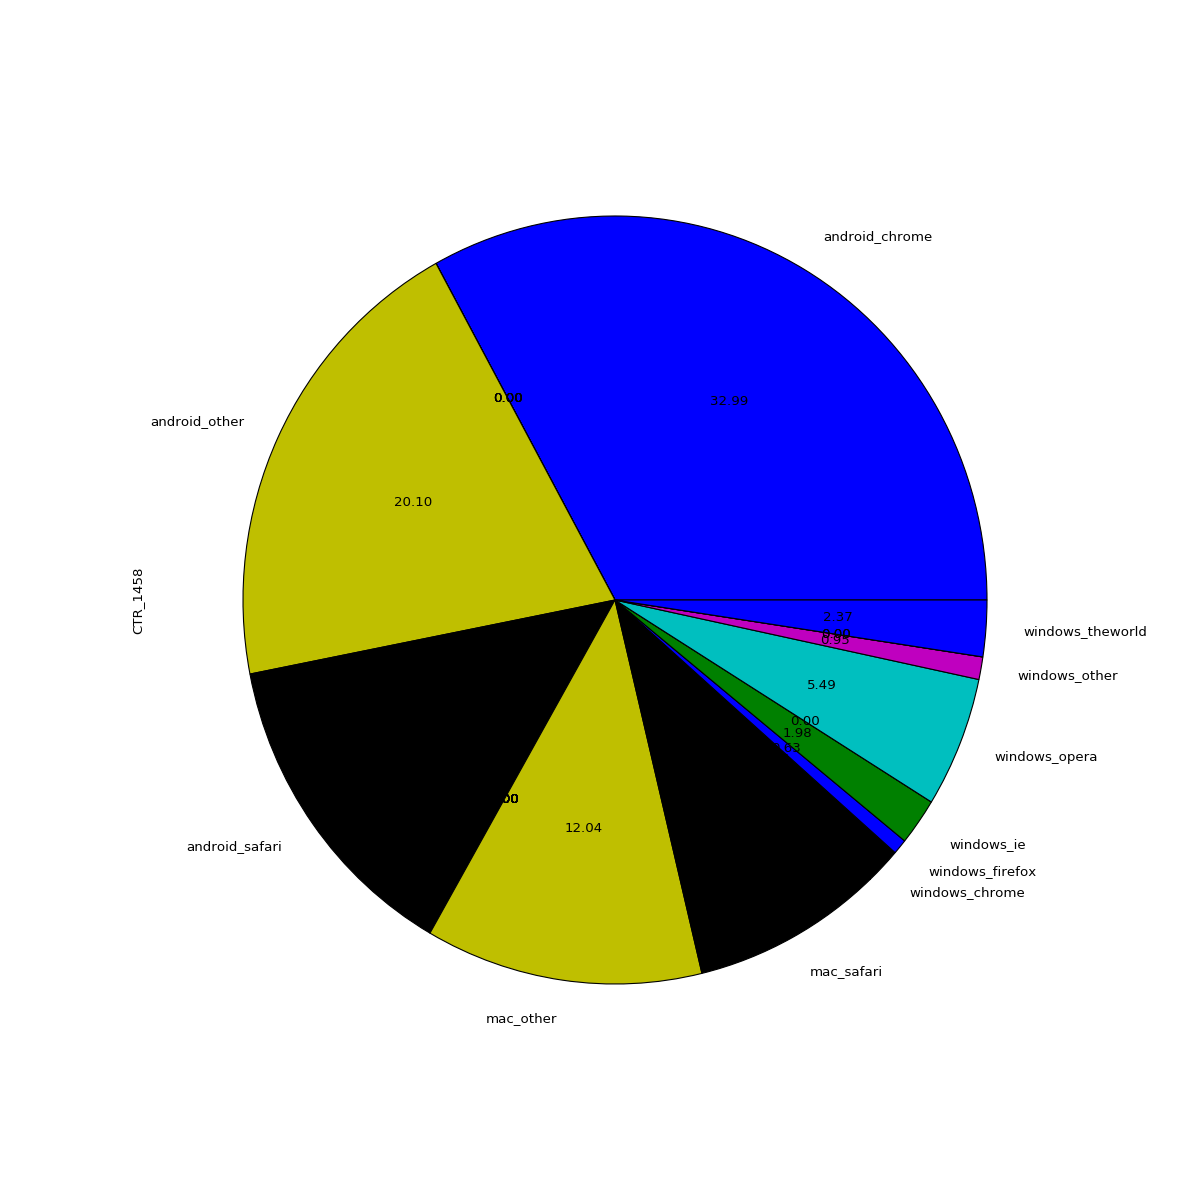

<IPython.core.display.Javascript object>


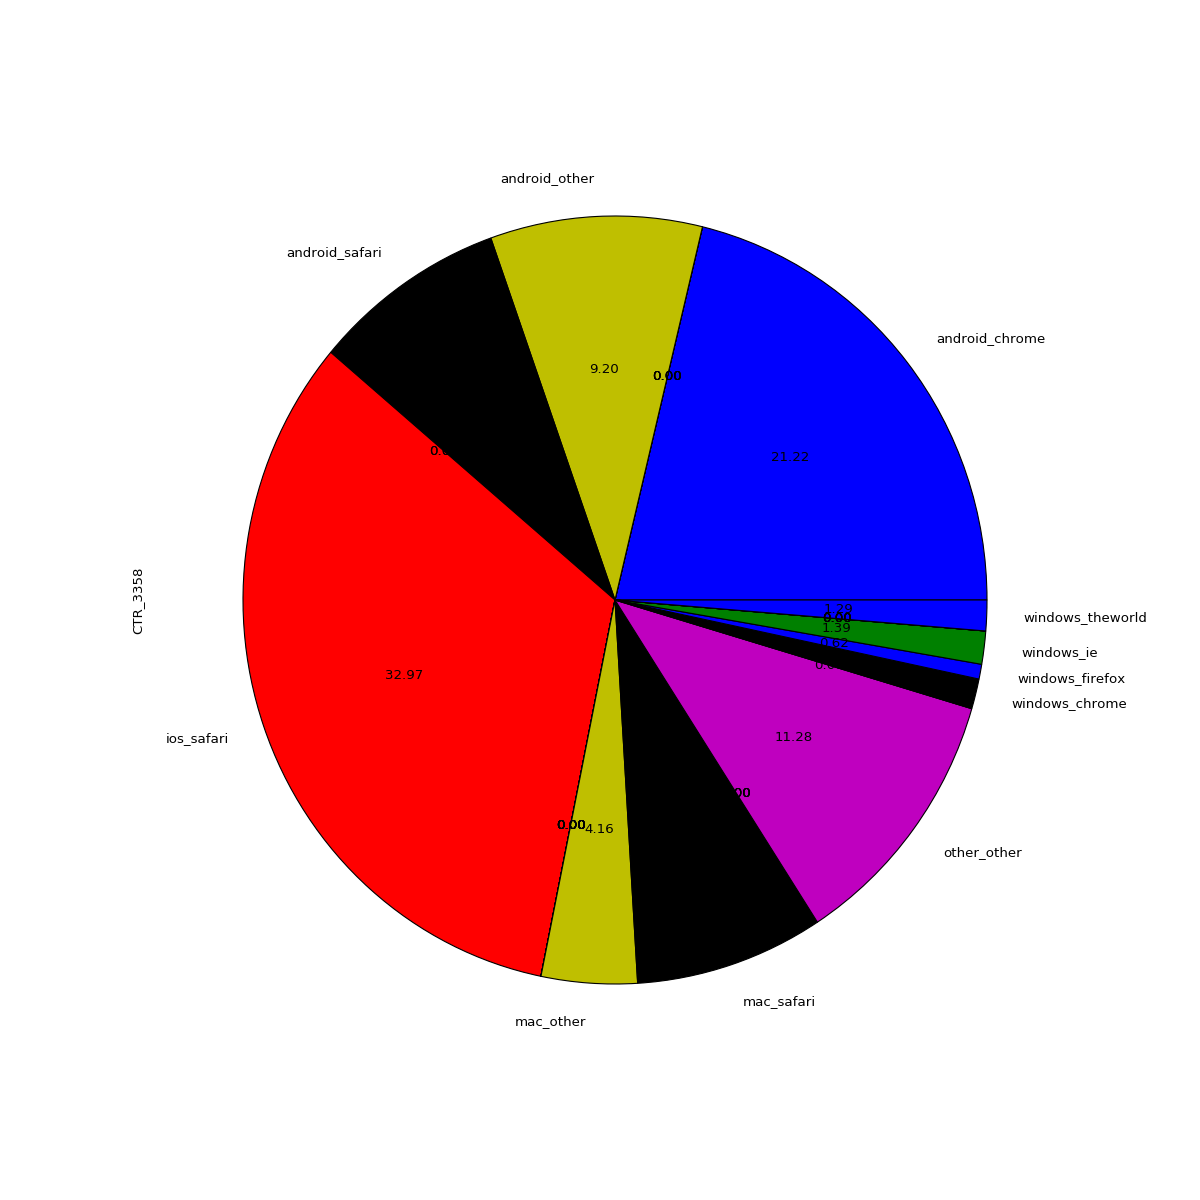

array([<matplotlib.axes._subplots.AxesSubplot object at 0x130bd4860>], dtype=object)

In [121]:
# Boxplot of CTR per user agent for advertiser 1458 & 3358
a1=useragent_CTR[['useragent','CTR_1458']]
a1 = a1.set_index('useragent')
a1.plot(subplots=True, kind='pie',figsize=(15,15), autopct='%0.2f',legend=False)
a2 = useragent_CTR[['useragent','CTR_3358']]
a2 = a2.set_index('useragent')
a2.plot(subplots=True, kind='pie',figsize=(15,15), autopct='%0.2f',legend=False)